In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !ls "/content/drive/My Drive/Term_Project_Unsupervised_Learners/graphs"
path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/"
f_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/feature/"
g_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/graphs/"
r_path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/results/"

In [ ]:
genre_list = ["Action","Adventure","Animation","Comedy","Crime","Documentary","Drama","Family","Fantasy","Foreign","History","Horror","Music","Mystery","Romance","Science Fiction","TV Movie","Thriller","War","Western"]

In [ ]:
def checkMissing(df,columns):
    print(df.loc[pd.isna(df[columns]).any(axis=1)])

# Generate Genre Distribution Plots

Fill out missing genre data

In [ ]:
# train_sub.to_csv(path+'train_sub_1980_2012.csv',index=None)
# train.to_csv(path+'train_1980_2014.csv',index=None)
# val.to_csv(path+'val_2013_2014.csv',index=None)
# test.to_csv(path+'test_2015_2017.csv',index=None)
# df_selected.to_csv(path+'aggregated_all_useful_columns_for_feature_engineering.csv',index=None)

In [ ]:
train_sub = pd.read_csv(path+'train_sub_1980_2012_prod_comp_class.csv')
train = pd.read_csv(path+'train_1980_2014_prod_comp_class.csv')
test = pd.read_csv(path+'test_2015_2017_prod_comp_class.csv')
val = pd.read_csv(path+'val_2013_2014_prod_comp_class.csv')

In [ ]:
# missing_g_index = train.loc[pd.isna(train[genre_list]).any(axis=1)].index
# for idx in missing_g_index:
#     for genre in genre_list:
#         train.at[idx,genre] = 0

In [ ]:
# missing_g_index_1 = train_sub.loc[pd.isna(train_sub[genre_list]).any(axis=1)].index
# for idx in missing_g_index_1:
#     for genre in genre_list:
#         train_sub.at[idx,genre]=0

In [ ]:
def generatePopularGenre(df):
    vote_genre = df[['vote_average']+genre_list]
    # print(vote_genre)
    genre_vote_mean = []
    for i in genre_list:
        genre_vote_mean.append(np.mean(vote_genre['vote_average'].loc[vote_genre[i] == 1]))
    # print(pd.DataFrame(genre_vote_mean,index=genre_list,columns=['vote_avg']))
    genre_df = pd.merge(pd.DataFrame(genre_vote_mean,index=genre_list,columns=['vote_avg']),pd.DataFrame(vote_genre[1:].mean(),columns=['pct']),left_index=True,right_index=True)
    genre_df.sort_values(by=['vote_avg','pct'],ascending=False,inplace=True)
    # print(genre_df)
    va_median = np.median(genre_df['vote_avg'])
    pop_cat = genre_df[np.where(genre_df['pct']>=0.05,True,False) & np.where(genre_df['vote_avg']>=va_median,True,False)].index.tolist()
    return pop_cat

In [ ]:
train_sub_pop_genres = generatePopularGenre(train_sub)
train_pop_genres = generatePopularGenre(train)
val_pop_genres = generatePopularGenre(train_sub)
test_pop_genres = generatePopularGenre(train)
print(train_sub_pop_genres,train_pop_genres,val_pop_genres,test_pop_genres)

['Drama', 'Crime', 'Mystery'] ['Drama', 'Crime', 'Mystery'] ['Drama', 'Crime', 'Mystery'] ['Drama', 'Crime', 'Mystery']


In [ ]:
train_sub['popular_genre'] = np.where(train_sub[train_sub_pop_genres].sum(axis=1)>0,1,0)
train['popular_genre'] = np.where(train[train_pop_genres].sum(axis=1)>0,1,0)
val['popular_genre'] = np.where(val[val_pop_genres].sum(axis=1)>0,1,0)
test['popular_genre'] = np.where(test[test_pop_genres].sum(axis=1)>0,1,0)

In [ ]:
train_sub.drop(columns=['Unnamed: 0'],inplace=True)
train.drop(columns=['Unnamed: 0'],inplace=True)
val.drop(columns=['Unnamed: 0'],inplace=True)
test.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# train_sub.to_csv(path+'train_sub_1980_2012_prod_comp_class_pop_genres.csv',index=None)
# train.to_csv(path+'train_1980_2014_prod_comp_class_pop_genres.csv',index=None)
# test.to_csv(path+'test_2015_2017_prod_comp_class_pop_genres.csv',index=None)
# val.to_csv(path+'val_2013_2014_prod_comp_class_pop_genres.csv',index=None)

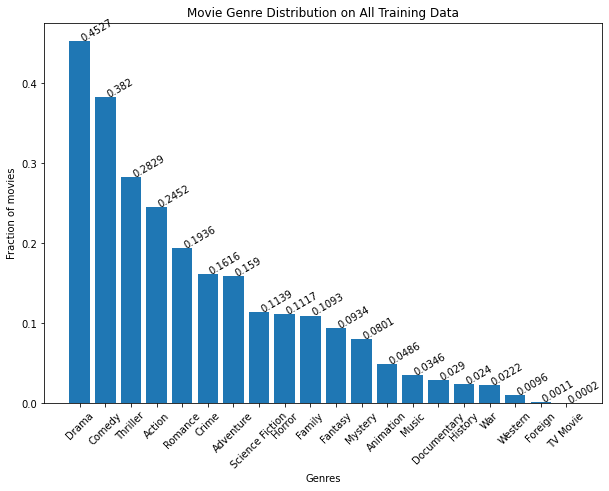

In [ ]:
# plot percentage of movies with feature 
# genre_mean = train_sub[genre_list].mean().sort_values(ascending=False)
genre_mean = train[genre_list].mean().sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.bar(genre_mean.index,genre_mean.values)
# plt.title('Movie Genre Distribution on the Training Data')
plt.title('Movie Genre Distribution on All Training Data')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Fraction of movies')
for i in range(len(genre_mean.index)):
    plt.annotate(round(genre_mean.values[i],4),xy=(i,genre_mean.iloc[i]),rotation=30)
plt.savefig(g_path+'genre_pct_train.png',bbox_inches = "tight")

Save datasets 

In [ ]:
test_new = pd.read_csv(path+'test_2015_2017_prod_comp_class_actor_director_istopk_logrev.csv')
train_sub_new = pd.read_csv(path+'train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev.csv')
train_new = pd.read_csv(path+'train_1980_2014_prod_comp_class_actor_director_istopk_logrev.csv')
val_new = pd.read_csv(path+'val_2013_2014_prod_comp_class_actor_director_istopk_logrev.csv')

In [ ]:
for df in [test_new,train_sub_new,train_new,val_new]:
    df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
test_new['popular_genre'] = test['popular_genre']
train_sub_new['popular_genre'] = train_sub['popular_genre']
train_new['popular_genre'] = train['popular_genre']
val_new['popular_genre'] = val['popular_genre']

In [ ]:
mgidx = train_sub_new.loc[pd.isna(train_sub_new[genre_list]).any(axis=1)]

In [ ]:
for idx in mgidx.index:
    for genre in genre_list:
        train_sub_new.at[idx,genre] = 0
        train_new.at[idx,genre] = 0

In [ ]:
# train_sub_new.to_csv(path+'train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev_genres.csv',index=None)
# train_new.to_csv(path+'train_1980_2014_prod_comp_class_actor_director_istopk_logrev_genres.csv',index=None)
# test_new.to_csv(path+'test_2015_2017_prod_comp_class_actor_director_istopk_logrev_genres.csv',index=None)
# val_new.to_csv(path+'val_2013_2014_prod_comp_class_actor_director_istopk_logrev_genres.csv',index=None)

In [ ]:
train['revenue_new']

Empty DataFrame
Columns: [id, title, imdb_id, release_date, release_year, runtime, title_length, top5_actors, log_revenue_final, log_budget_final, revenue_new, budget_final, first_company, gender_score, has_oscar_winner, Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, Foreign, History, Horror, Music, Mystery, Romance, Science Fiction, TV Movie, Thriller, War, Western, popular_genre, collection_name, collection, first_in_collection, sequel, crew, cast, genres, production_companies, vote_average, vote_count, production_company_class, top1_director]
Index: []


# Standardization

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
train_sub = pd.read_csv(path+'train_sub_1990_2012_final.csv')
train = pd.read_csv(path+'train_1990_2014_final.csv')
val = pd.read_csv(path+'val_2013_2014_final.csv')
test = pd.read_csv(path+'test_2015_2017_final.csv')


In [ ]:
for df in [train_sub,train,val,test]:
    df[pd.get_dummies(df['production_company_class']).columns] = pd.get_dummies(df['production_company_class'])
    # print(df['production_company_class'].astype('category').cat.codes)
    # df['pcc_numeric'] = 

In [ ]:
actors_binaries = ['actor_is_top_100_of_past_2_years_0',
 'actor_is_top_100_of_past_2_years_1',
 'actor_is_top_100_of_past_2_years_2',
 'actor_is_top_100_of_past_2_years_3',
 'actor_is_top_100_of_past_2_years_4',
 'actor_is_top_100_of_past_5_years_0',
 'actor_is_top_100_of_past_5_years_1',
 'actor_is_top_100_of_past_5_years_2',
 'actor_is_top_100_of_past_5_years_3',
 'actor_is_top_100_of_past_5_years_4',
 'actor_is_top_100_of_past_10_years_0',
 'actor_is_top_100_of_past_10_years_1',
 'actor_is_top_100_of_past_10_years_2',
 'actor_is_top_100_of_past_10_years_3',
 'actor_is_top_100_of_past_10_years_4',
 'director_is_top_50_of_past_2_years_0',
 'director_is_top_50_of_past_5_years_0',
 'director_is_top_50_of_past_10_years_0']

actors_numeric = ['actor_logrev_of_past_2_years_0',
 'actor_logrev_of_past_2_years_1',
 'actor_logrev_of_past_2_years_2',
 'actor_logrev_of_past_2_years_3',
 'actor_logrev_of_past_2_years_4',
 'actor_logrev_of_past_5_years_0',
 'actor_logrev_of_past_5_years_1',
 'actor_logrev_of_past_5_years_2',
 'actor_logrev_of_past_5_years_3',
 'actor_logrev_of_past_5_years_4',
 'actor_logrev_of_past_10_years_0',
 'actor_logrev_of_past_10_years_1',
 'actor_logrev_of_past_10_years_2',
 'actor_logrev_of_past_10_years_3',
 'actor_logrev_of_past_10_years_4',
 'director_logrev_of_past_2_years_0',
 'director_logrev_of_past_5_years_0',
 'director_logrev_of_past_10_years_0']

binaries = ['has_oscar_winner','popular_genre','first_in_collection','sequel','major','minor','medium']+genre_list+actors_binaries
numerics=['runtime','title_length','log_budget_final']+actors_numeric+['gender_score']
features = numerics+binaries

In [ ]:
new_numerics = ['runtime','title_length','budget_final']+actors_numeric+['gender_score']
new_binaries = ['has_oscar_winner','popular_genre','first_in_collection','sequel','major','minor','medium']+genre_list+actors_binaries
new_features = new_numerics+new_binaries

In [ ]:
def standardize(df,new,st=True):
    if st: 
        ss = preprocessing.StandardScaler()
    else: ss = preprocessing.MinMaxScaler()
    scaled = pd.DataFrame(ss.fit_transform(df[numerics]),columns=numerics)
    scaled[binaries] = df[binaries].astype('int64')
    if new: 
        scaled = pd.DataFrame(ss.fit_transform(df[new_numerics]),columns=new_numerics)
        scaled[new_binaries] = df[new_binaries].astype('int64')
    return scaled

In [ ]:
rescaled_train_sub = standardize(train_sub,False)
rescaled_train = standardize(train,False)
rescaled_val = standardize(val,False)
rescaled_test = standardize(test,False)

In [ ]:
rescaled_train_sub_new = standardize(train_sub,True)
rescaled_train_new = standardize(train,True)
rescaled_val_new = standardize(val,True)
rescaled_test_new = standardize(test,True)

In [ ]:
log_revenue = df_selected['log_revenue_final']
rescaled_log_revenue = (log_revenue - np.mean(log_revenue))/np.std(log_revenue)

# Plot Log Revenue against Release Years

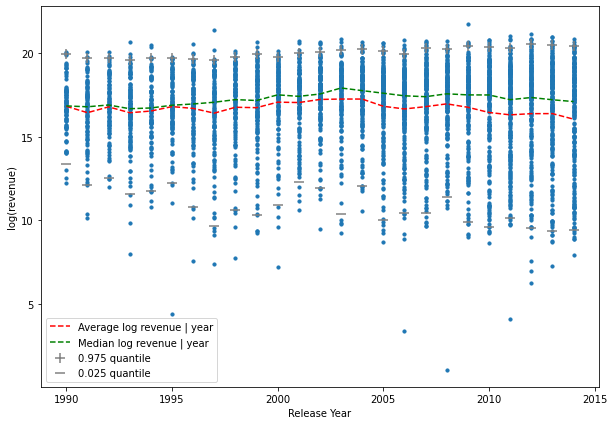

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(train['release_year'],train['log_revenue_final'],s=10)
plt.xlabel('Release Year')
plt.ylabel('log(revenue)')
plt.plot(train.groupby('release_year')['log_revenue_final'].mean().index,train.groupby('release_year')['log_revenue_final'].mean().values,'r--',label='Average log revenue | year')
plt.plot(train.groupby('release_year')['log_revenue_final'].median().index,train.groupby('release_year')['log_revenue_final'].median().values,'g--',label='Median log revenue | year')
plt.scatter(train.groupby('release_year')['log_revenue_final'].quantile(0.975).index, train.groupby('release_year')['log_revenue_final'].quantile(0.975).values,c='grey',marker='+',s=100,label='0.975 quantile')
plt.scatter(train.groupby('release_year')['log_revenue_final'].quantile(0.025).index, train.groupby('release_year')['log_revenue_final'].quantile(0.025).values,c='grey',marker='_',s=100,label='0.025 quantile')

plt.legend()
 
plt.show()
# plt.savefig(g_path+'release_year_log_revenue_trend1.png',bbox_inches='tight')

# Correlation Analysis


Try Hiearchical Clustering on Spearman Rank Correlaton (not used in final report because spearman on discrete variables is not interpretable)

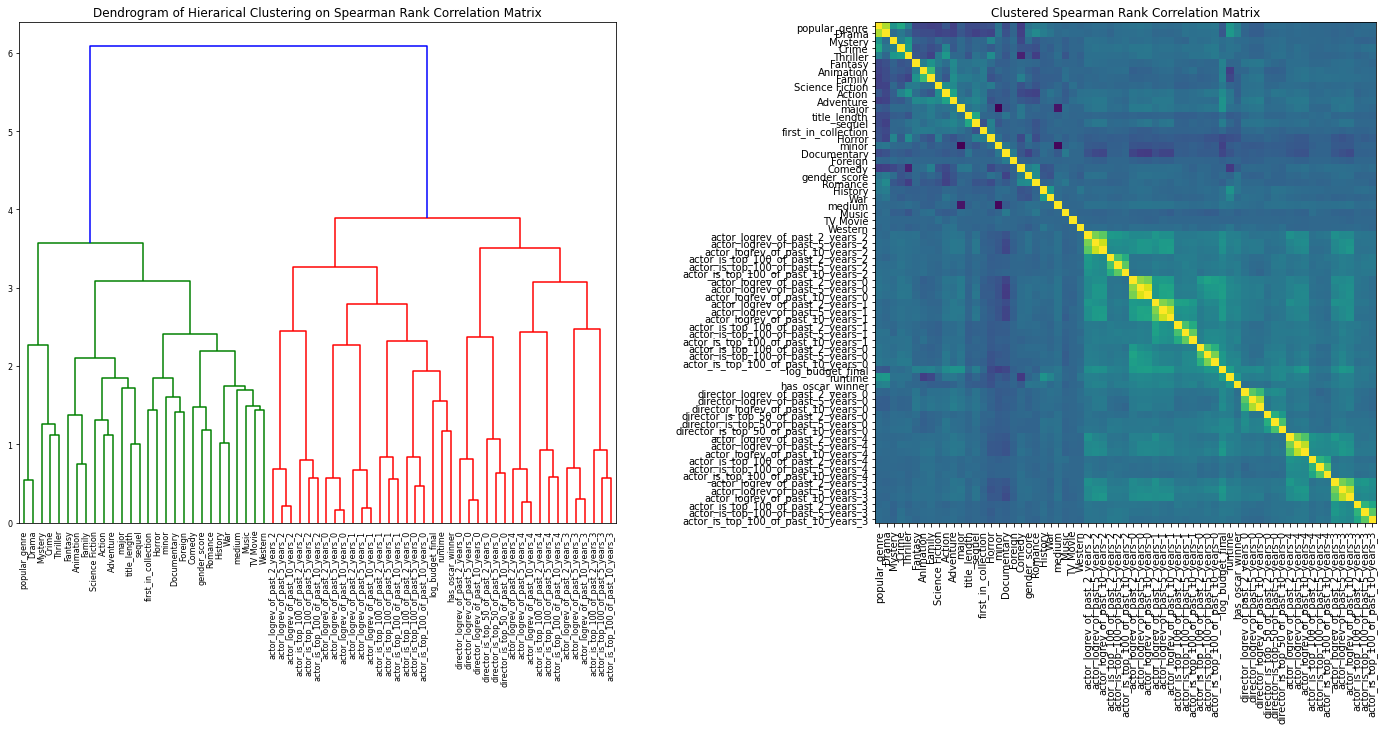

In [ ]:
# from scipy.stats import spearmanr
from scipy.cluster import hierarchy
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
# corr = corr.to_numpy()
corr = train_sub[features].corr().to_numpy()
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=features, ax=ax1, leaf_rotation=90)
ax1.tick_params(labelsize=8)
ax1.set_title('Dendrogram of Hierarical Clustering on Spearman Rank Correlation Matrix')

dendro_idx = np.arange(0, len(dendro['ivl']))
ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
ax2.set_title('Clustered Spearman Rank Correlation Matrix')
fig.tight_layout()
plt.show() 

In [ ]:
# train_sub[features].to_csv(path+'train_sub_features_only.csv',index=None)

Calculated mixed correlation matrix using psych package in R

In [ ]:
corr = pd.read_csv(path+"correlation_matrix1.csv",index_col=0)
corr.columns = corr.index

In [ ]:
corr_mat = corr.to_numpy()
spearman = np.full(corr_mat.shape,np.nan)
spearman[:len(numerics),:len(numerics)] = corr_mat[:len(numerics),:len(numerics)]

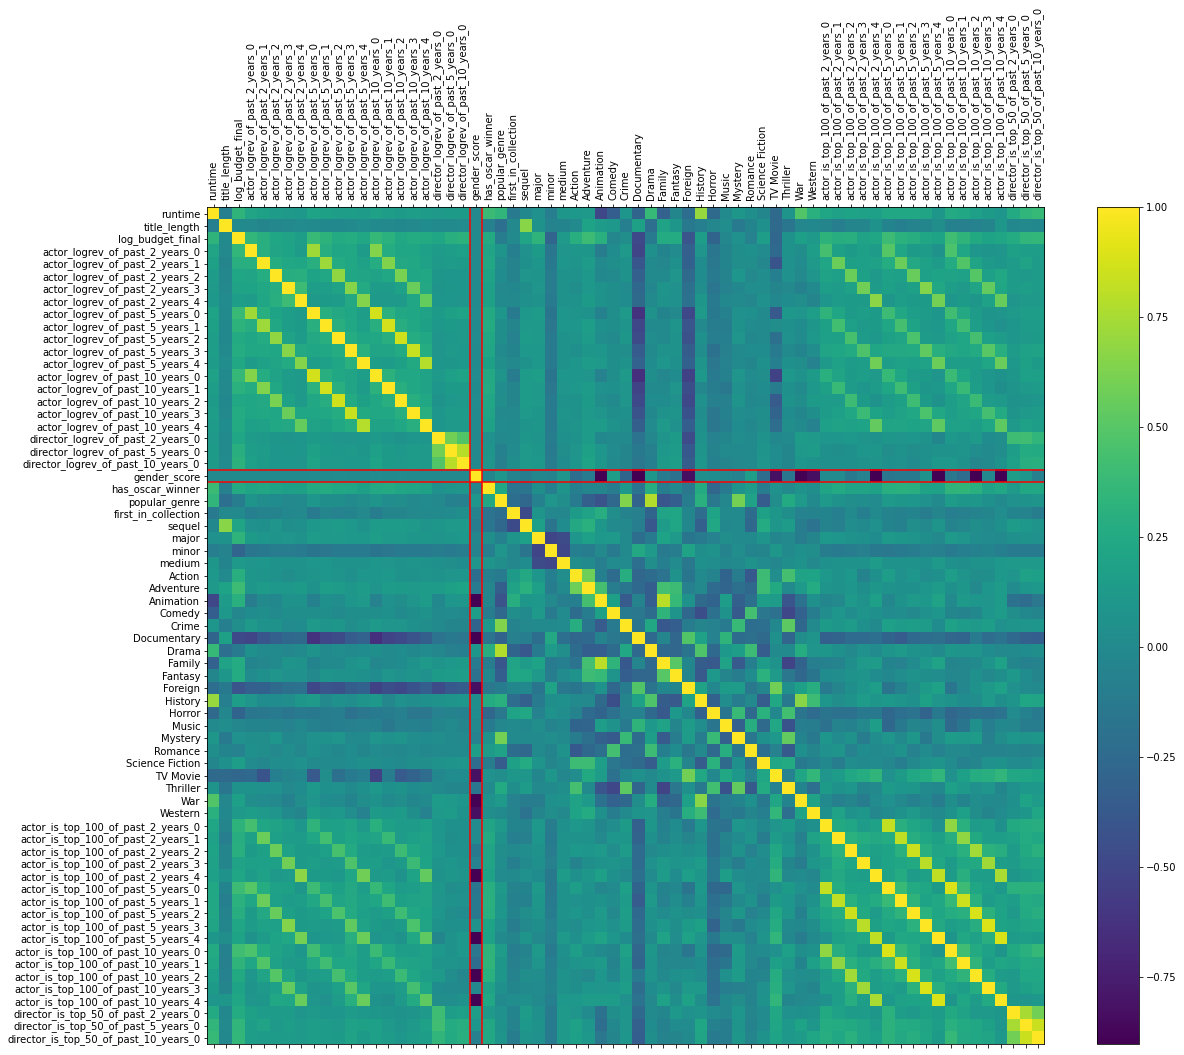

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
# plt.matshow(spearman,fignum=f.number)
plt.xticks(range(train_sub[features].shape[1]), features,rotation=90)
plt.yticks(range(train_sub[features].shape[1]), features)
# plt.title('Mixed Correlation Matrix')
plt.axvline(x=len(numerics)-1.5,color='red')
plt.axhline(y=len(numerics)-1.5,color='red')
plt.axvline(x=len(numerics)-0.5,color='red')
plt.axhline(y=len(numerics)-0.5,color='red')
cb = plt.colorbar()
plt.savefig(g_path+'mixed_correlation_matrix.png',bbox_inches = "tight")

# Mutual Information and F-Test Statistic


In [ ]:
import sklearn.feature_selection as fs

In [ ]:
discrete = np.concatenate([np.full(len(numerics),False),np.full(len(binaries),True)])

In [ ]:
no_actors_numerics = ['runtime',
 'title_length',
 'log_budget_final','gender_score'] + binaries

In [ ]:
discrete_new = np.concatenate([[False,False,False,False],np.full(len(binaries),True)])

In [ ]:
skb = fs.mutual_info_regression(train_sub[features],train_sub['log_revenue_final'],discrete_features=discrete)

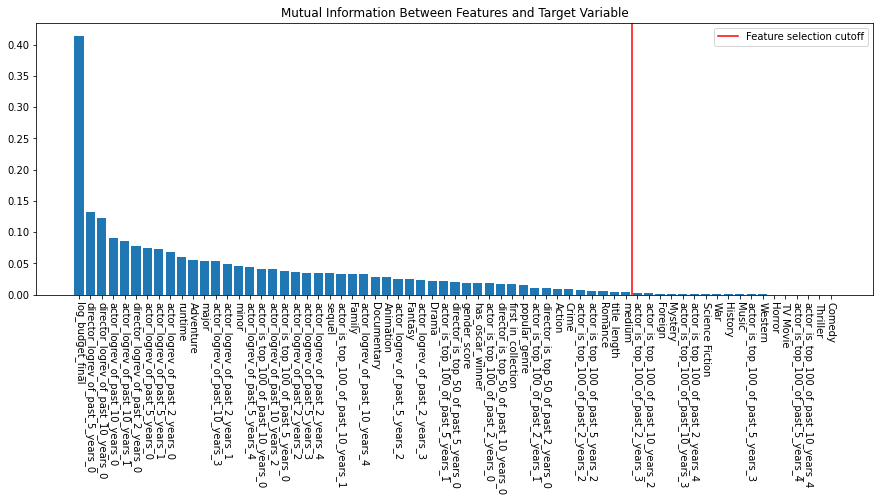

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(train_sub[features].columns[np.argsort(skb)[::-1]], skb[np.argsort(skb)[::-1]])
plt.xticks(rotation=-90)
plt.title('Mutual Information Between Features and Target Variable')
plt.axvline(48+0.5,c='red',label='Feature selection cutoff')
plt.legend()
# plt.show()
plt.savefig(g_path+'mutual_information_train_sub1.png',bbox_inches = "tight")

In [ ]:
mi_ranking = pd.Series(features)[np.argsort(skb)[::-1]]
pd.DataFrame(mi_ranking).to_csv(g_path+"mutual_information_ranking1.txt",index=None)

In [ ]:
ftest,pvalues = fs.f_regression(train_sub[features],train_sub['log_revenue_final'])

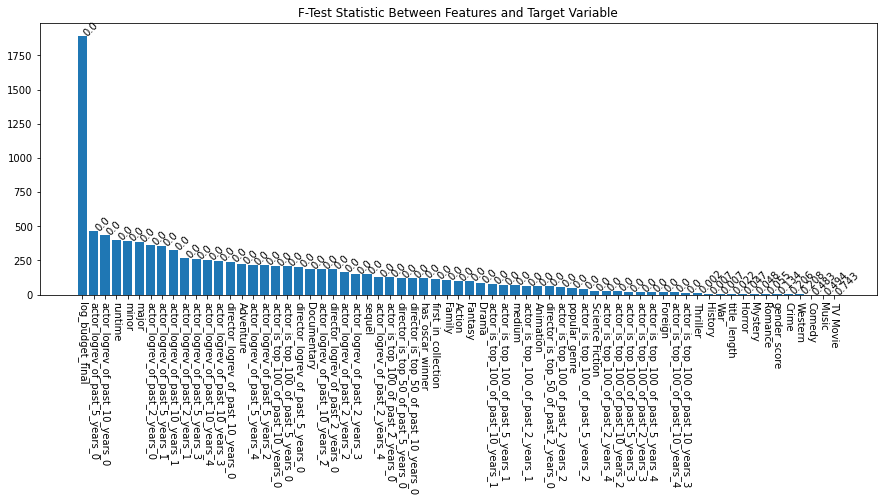

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(pd.Series(features)[np.argsort(ftest)[::-1]], ftest[np.argsort(ftest)[::-1]])
for f in range(len(features)):
    plt.annotate(pvalues[f].round(3), xy=(pd.Series(features)[f],ftest[f]),rotation=45)
plt.xticks(rotation=-90)
plt.title('F-Test Statistic Between Features and Target Variable')
plt.savefig(g_path+'f_test_statistic_train_sub1.png',bbox_inches = "tight")

In [ ]:
ftest_ranking = rescaled_train_sub.columns[np.argsort(ftest)[::-1]]
pd.DataFrame(ftest_ranking).to_csv(g_path+"f_test_ranking1.txt",index=None)